In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import itertools
import cloveFunctions as clv
import matplotlib.pyplot as plt
import json

In [5]:
def load_all_data():
    cnv = pd.read_csv('data_large/all_thresholded.by_genes_whitelisted.tsv', sep='\t')
    cnv.set_index('Gene Symbol', drop=True, inplace=True)
    exp = pd.read_csv('data_large/out_noDuplicateSLC35E2.tsv.gz',compression='gzip', sep='\t')
#     casedf = pd.read_csv('data/tcga_cases.20181026.tab.gz', sep='\t', compression='gzip', index_col=0)
#     casedf.info()
    return cnv, exp #, casedf

In [9]:
casedf = pd.read_csv('data/tcga_cases.20181026.tab.gz', sep='\t', compression='gzip', index_col=0)
casedf[casedf['primary_site'].str.contains('bone')]

,primary_site,submitter_id,summary,gender


In [2]:
def subset_main(site='kidney', save=False):
    expdf = pd.read_csv('data_large/out_noDuplicateSLC35E2.tsv.gz', compression='gzip', sep='\t', index_col=0)
    expdf = clv.subset_by_tissue(expdf, tissue=site, trunc_id=True)
    
    cnvdf = pd.read_csv('data_large/all_thresholded.by_genes_whitelisted.tsv', sep='\t', index_col=0)  
    cnvdf = clv.subset_by_tissue(cnvdf, tissue=site, trunc_id=True)
    
    if save:
        cnvdf.to_csv('data_large/tcga_'+site+'_cnv.tab.gz', compression='gzip', sep='\t')
        expdf.to_csv('data_large/tcga_'+site+'_exp.tab.gz', compression='gzip', sep='\t')
    return expdf, cnvdf

In [4]:
def load_kidney_file():
    expkid=pd.read_csv('data_large/tcga_kidney_exp.tab.gz', compression='gzip', sep='\t', index_col=0)
    cnvkid=pd.read_csv('data_large/tcga_kidney_cnv.tab.gz', compression='gzip', sep='\t', index_col=0)
    
    expkid.columns = [col[:12] for col in expkid.columns]
    cnvkid.columns = [col[:12] for col in cnvkid.columns]
    return expkid, cnvkid

In [5]:
expkid, cnvkid = load_kidney_file()

In [6]:
# filter and pre-process data
expkid, cnvkid = clv.mainFitler(expkid, cnvkid, var=0.2, n=20, amp_fh=False, dele_fh=False, mut_fh=False, save=False)

before filtering:
exp:
<class 'pandas.core.frame.DataFrame'>
Index: 20531 entries, ?|100130426 to ZZZ3|26009
Columns: 1022 entries, TCGA-2K-A9WE to TCGA-KO-8417
dtypes: float64(1022)
memory usage: 160.2+ MB
None
cnv:
<class 'pandas.core.frame.DataFrame'>
Index: 25128 entries, ACAP3 to VAMP7|chrX
Columns: 859 entries, TCGA-KL-8323 to TCGA-WK-A8XT
dtypes: int64(859)
memory usage: 164.9+ MB
None
after filtering (min_var=0.2, min_n=20:
exp:
<class 'pandas.core.frame.DataFrame'>
Index: 19216 entries, ?|100133144 to ZZZ3|26009
Columns: 985 entries, TCGA-CZ-5461 to TCGA-BP-5191
dtypes: float64(985)
memory usage: 144.6+ MB
None
cnv:
<class 'pandas.core.frame.DataFrame'>
Index: 11530 entries, ACP1 to VBP1
Columns: 857 entries, TCGA-CZ-5461 to TCGA-BP-5191
dtypes: int64(857)
memory usage: 75.5+ MB
None


In [16]:
# clean up |num form gene_id index column
expkid = clv.clean_exp_geneIDx(expkid)

In [22]:
[expkid.sample(n=1).index[0] for i in range(2)]

['PER1|5187', 'ZNF449|203523']

In [7]:
%%time
clvkid = clv.randomPairContextStat(1000000, expkid, cnvkid, permute=True)

CPU times: user 3h 45min 42s, sys: 26.8 s, total: 3h 46min 9s
Wall time: 3h 46min 11s


In [9]:
clvkid.to_csv('data/tcga_kidney_cloves.tab.gz', compression='gzip', sep='\t')

bone

In [3]:
expbon, cnvbon = subset_main(site='bone', save=True)
print('subset complete')
expbon, cnvbon = clv.mainFitler(expbon, cnvbon, var=0.2, n=20, amp_fh=False, dele_fh=False, mut_fh=False, save=False)
print('filtering complete')
expbon = clv.clean_exp_geneIDx(expbon)


subset complete
before filtering:
exp:
<class 'pandas.core.frame.DataFrame'>
Index: 20531 entries, ?|100130426 to ZZZ3|26009
Data columns (total 4 columns):
TCGA-RQ-A6JB-01A-11R-A31O-07    20531 non-null float64
TCGA-CQ-A4CD-01A-21R-A24Z-07    20531 non-null float64
TCGA-DX-A3UA-01A-12R-A30C-07    20531 non-null float64
TCGA-IF-A4AJ-01A-11R-A24X-07    20531 non-null float64
dtypes: float64(4)
memory usage: 802.0+ KB
None
cnv:
<class 'pandas.core.frame.DataFrame'>
Index: 20531 entries, ?|100130426 to ZZZ3|26009
Data columns (total 4 columns):
TCGA-RQ-A6JB-01A-11R-A31O-07    20531 non-null float64
TCGA-CQ-A4CD-01A-21R-A24Z-07    20531 non-null float64
TCGA-DX-A3UA-01A-12R-A30C-07    20531 non-null float64
TCGA-IF-A4AJ-01A-11R-A24X-07    20531 non-null float64
dtypes: float64(4)
memory usage: 802.0+ KB
None
after filtering (min_var=0.2, min_n=20:
exp:
<class 'pandas.core.frame.DataFrame'>
Index: 18102 entries, ?|100133144 to ZZZ3|26009
Data columns (total 4 columns):
TCGA-CQ-A4CD-01A-21R-

In [4]:
# not enough data for bone (only 4 samples)
clvbon = clv.randomPairContextStat(10, expbon, cnvbon, permute=True)
clvbon

ValueError: a must be greater than 0

lung


In [3]:
# explung, cnvlung = subset_main(site='lung', save=True)
# print('subset complete\n')
explung=pd.read_csv('data_large/tcga_site_exp.tab.gz', compression='gzip', sep='\t', index_col=0)
cnvlung=pd.read_csv('data_large/tcga_site_cnv.tab.gz', compression='gzip', sep='\t', index_col=0)

explung, cnvlung = clv.mainFitler(explung, cnvlung, var=0.2, n=20, amp_fh=False, dele_fh=False, mut_fh=False, save=False)
print('filtering complete\n')
explung = clv.clean_exp_geneIDx(explung)

before filtering:
exp:
<class 'pandas.core.frame.DataFrame'>
Index: 20531 entries, ?|100130426 to ZZZ3|26009
Columns: 1354 entries, TCGA-18-3406 to TCGA-3H-AB3X
dtypes: float64(1354)
memory usage: 212.2+ MB
None
cnv:
<class 'pandas.core.frame.DataFrame'>
Index: 25128 entries, ACAP3 to VAMP7|chrX
Columns: 999 entries, TCGA-05-4244 to TCGA-3H-AB3X
dtypes: int64(999)
memory usage: 191.7+ MB
None
after filtering (min_var=0.2, min_n=20:
exp:
<class 'pandas.core.frame.DataFrame'>
Index: 19505 entries, ?|100133144 to ZZZ3|26009
Columns: 993 entries, TCGA-66-2734 to TCGA-71-6725
dtypes: float64(993)
memory usage: 147.9+ MB
None
cnv:
<class 'pandas.core.frame.DataFrame'>
Index: 11304 entries, NOTCH2 to VAMP7|chrX
Columns: 993 entries, TCGA-66-2734 to TCGA-71-6725
dtypes: int64(993)
memory usage: 85.7+ MB
None
filtering complete



In [6]:
%%time
clvlung = clv.randomPairContextStat(1000000, explung, cnvlung, permute=True)

attempting 1000000 of 220247136 total possible pairs post-filtering
pair computation 10% complete (100000/220247136)
pair computation 20% complete (200000/220247136)
pair computation 30% complete (300000/220247136)
pair computation 40% complete (400000/220247136)
pair computation 50% complete (500000/220247136)
pair computation 60% complete (600000/220247136)
pair computation 70% complete (700000/220247136)
pair computation 80% complete (800000/220247136)
pair computation 90% complete (900000/220247136)
pair computation 100% complete (1000000/220247136)
CPU times: user 4h 23min 21s, sys: 19min 4s, total: 4h 42min 25s
Wall time: 4h 42min 24s


In [9]:
clvlung.to_csv('data/tcga_lung_cloves.tab.gz', compression='gzip', sep='\t')

In [5]:
# LUAD	Lung adenocarcinoma
# LUSC	Lung squamous cell carcinoma
# BRCA	Breast invasive carcinoma'TCGA-OR-A5J1

# below json files exported from json export of respective tissue searches from https://gdc.cancer.gov/
# samples are first TCGA-XX-XXXX of extended id barcode


brca_samples = list(pd.read_json('tcga/BRCA_cases_2018-03-23.json')['submitter_id'])
luad_samples = list(pd.read_json('tcga/LUAD_cases_2018-03-23.json')['submitter_id'])
lusc_samples = list(pd.read_json('tcga/LUSC_cases_2018-03-23.json')['submitter_id'])

samples = [brca_samples, luad_samples, lusc_samples]
sample_names = ['brca', 'luad', 'lusc']

ValueError: Unexpected character found when decoding 'true'

In [ ]:
cnv = pd.read_csv('tcga/all_thresholded.by_genes_whitelisted.tsv', sep='\t')
exp = pd.read_csv('tcga/out_noDuplicateSLC35E2.tsv.gz',compression='gzip', sep='\t')

In [ ]:
cnv[['Gene Symbol', 'Locus ID', 'Cytoband']].to_pickle('geneSymbol_locus_cytoband.p')

In [7]:
name = exp['gene_id'].str.split('|').apply(pd.Series)
name.columns=['gene_id','junk']
del name['junk']

,gene_id,junk
0,?,100130426
1,?,100133144


In [21]:
exp = exp.merge(right=name, left_index=True, right_index=True)

In [28]:
del exp['gene_id_x']
exp.set_index('gene_id_y', drop=True, inplace=True)
exp.rename_axis('gene_id', axis=0, inplace=True)  # inplace arguement appears not to work in this situation

,TCGA-OR-A5J1-01A-11R-A29S-07,TCGA-OR-A5J2-01A-11R-A29S-07,TCGA-OR-A5J3-01A-11R-A29S-07,TCGA-OR-A5J5-01A-11R-A29S-07,TCGA-OR-A5J6-01A-31R-A29S-07,TCGA-OR-A5J7-01A-11R-A29S-07,TCGA-OR-A5J8-01A-11R-A29S-07,TCGA-OR-A5J9-01A-11R-A29S-07,TCGA-OR-A5JA-01A-11R-A29S-07,TCGA-OR-A5JB-01A-11R-A29S-07,...,TCGA-CG-4449-01A-01R-1157-13,TCGA-CG-4462-01A-01R-1157-13,TCGA-CG-4465-01A-01R-1157-13,TCGA-CG-4466-01A-01R-1157-13,TCGA-CG-4469-01A-01R-1157-13,TCGA-CG-4472-01A-01R-1157-13,TCGA-CG-4474-01A-02R-1157-13,TCGA-CG-4475-01A-01R-1157-13,TCGA-CG-4476-01A-01R-1157-13,TCGA-CG-4477-01A-01R-1157-13
gene_id,,,,,,,,,,,,,,,,,,,,,
?,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
?,3.2661,2.6815,1.7301,0.0000,0.0000,1.1673,1.4422,0.0000,4.4556,7.1293,...,4.358154,5.676995,5.219350,14.846708,20.115492,6.997533,18.311906,12.057112,18.628740,17.874417
?,3.9385,8.9948,6.5650,1.5492,4.4709,6.0529,2.2876,1.3599,5.0581,0.0000,...,2.656360,3.342794,2.423442,5.055287,11.626054,13.654193,7.417109,11.585177,11.482418,14.919338
?,149.1350,81.0777,86.4879,53.9117,66.9063,103.5060,94.9316,78.1955,69.2389,155.7090,...,633.299781,294.018042,686.569179,563.573453,1039.307597,639.238135,742.479964,506.336449,712.452165,703.713324
?,2034.1000,1304.9300,1054.6600,2350.8900,1257.9900,1866.4300,995.0270,1762.1200,1213.5300,2005.5700,...,1202.538277,644.002317,1181.884532,663.885074,647.530395,1297.152549,1152.909807,1375.495774,971.893874,1736.988111
?,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
?,274.2550,199.3020,348.3930,439.1940,149.2150,64.5808,377.9530,274.3640,243.1290,93.5725,...,87.408466,140.001693,108.852744,117.607340,303.513122,57.924566,166.813851,115.805483,188.696451,96.991756
?,1.4409,0.0000,0.5925,0.7746,0.0000,0.0000,1.6577,0.0000,2.1142,0.0000,...,0.489337,0.527482,0.087451,1.201876,0.087451,0.513451,0.497339,0.087451,1.303840,0.087451
?,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
exp = exp.rename_axis('gene_id', axis=0)  # this works, though

In [35]:
# exp.to_csv('tcga/exp_tab.gz', compression='gzip')

In [3]:
# mRNA data originally from /projects/sysbio/tcga/out_noDuplicateSLC35E2.tsv 
exp = pd.read_csv('tcga/exp_tab.gz', compression='gzip')

In [ ]:
cnv = pd.read_csv('tcga/cnv_tab.gz', compression='gzip')

In [50]:
# cnv.to_csv('tcga/cnv_tab.gz', sep='\t', compression='gzip')

In [43]:
# exp.to_csv('tcga/exp_tab.gz', sep='\t', compression='gzip')

In [81]:
brca_samples = list(pd.read_json('tcga/BRCA_cases_2018-03-23.json')['submitter_id'])
luad_samples = list(pd.read_json('tcga/LUAD_cases_2018-03-23.json')['submitter_id'])
lusc_samples = list(pd.read_json('tcga/LUSC_cases_2018-03-23.json')['submitter_id'])

samples = [brca_samples, luad_samples, lusc_samples]
sample_names = ['brca', 'luad', 'lusc']

brca_cnv, brca_exp = tcgaTissueSelect(brca_samples, 'brca', cnv, exp, save='tcga/')

In [208]:
b_cnv, b_exp = clv.tcgaTissueSelect(brca_samples, 'brca', cnv, exp)

NameError: name 'cnv' is not defined

In [214]:
brca_exp.to_csv('tcga/brca_exp.tab.gz', sep='\t', compression='gzip')

In [203]:
# binerize copy number values (1=del, 0=nodel) for both het and hom loss
brca_cnv_het = brca_cnv[(brca_cnv == 0) | (brca_cnv == -1)].replace(to_replace=-1, value=1).astype(dtype='float32')
brca_cnv_hom = brca_cnv[(brca_cnv == 0) | (brca_cnv == -2)].replace(to_replace=-2, value=1).astype(dtype='float32')

In [211]:
# # saving progress
# brca_cnv_het.to_csv('tcga/brca_cnv_het.tab.gz', sep='\t', compression='gzip')
# brca_cnv_hom.to_csv('tcga/brca_cnv_hom.tab.gz', sep='\t', compression='gzip')

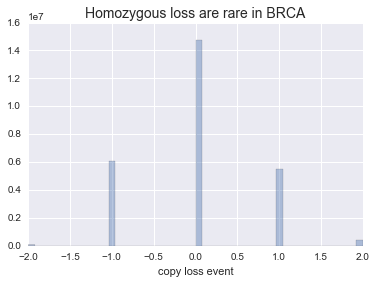

In [162]:
%matplotlib inline
sns.distplot(brca_cnv.values.flatten(), norm_hist=False, kde=False)
plt.title('Homozygous loss are rare in BRCA', {'fontsize':14})
plt.xlabel('copy loss event')
plt.show()

In [122]:
# each element in below arrays is number of events in a sample
no_loss = brca_cnv[brca_cnv == 0].count(axis=1)      # no loss seen, neutral copy
event_df = pd.DataFrame(no_loss, columns=['no_loss'])

event_df['hom_gain'] = brca_cnv[brca_cnv == 2].count(axis=1)    # homozygous gain events
event_df['het_gain'] = brca_cnv[brca_cnv == 1].count(axis=1)    # heterozygous gain events

event_df['het_loss'] = brca_cnv[brca_cnv == -1].count(axis=1)    # heterozygous loss events
event_df['hom_loss'] = brca_cnv[brca_cnv == -2].count(axis=1)    # homozygous loss events

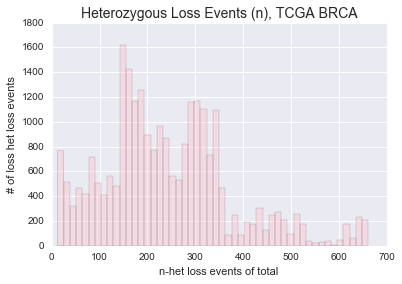

In [163]:
%matplotlib inline
sns.distplot(event_df['het_loss'], kde=False, color='pink')
plt.title('Heterozygous Loss Events (n), TCGA BRCA', {'fontsize':14})
plt.ylabel('# of loss het loss events')
plt.xlabel('n-het loss events of total')
plt.show()

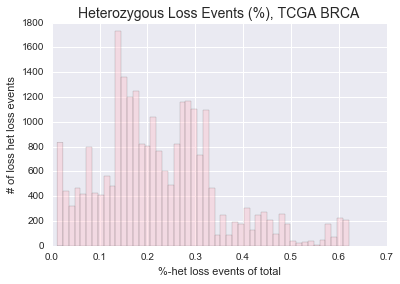

In [164]:
%matplotlib inline
sns.distplot(event_df['het_loss']/event_df.sum(axis=1), kde=False, color='pink')
plt.title('Heterozygous Loss Events (%), TCGA BRCA', {'fontsize':14})
plt.ylabel('# of loss het loss events')
plt.xlabel('%-het loss events of total')
plt.show()

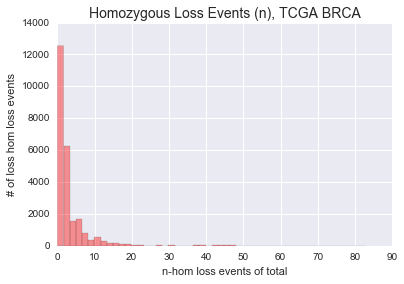

In [165]:
%matplotlib inline
sns.distplot(event_df['hom_loss'], kde=False, color='red')
plt.title('Homozygous Loss Events (n), TCGA BRCA', {'fontsize':14})
plt.ylabel('# of loss hom loss events')
plt.xlabel('n-hom loss events of total')
plt.show()

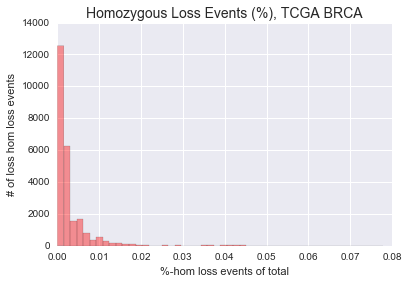

In [166]:
%matplotlib inline
sns.distplot(event_df['hom_loss']/event_df.sum(axis=1), kde=False, color='red')
plt.title('Homozygous Loss Events (%), TCGA BRCA', {'fontsize':14})
plt.ylabel('# of loss hom loss events')
plt.xlabel('%-hom loss events of total')
plt.show()

More samples with normal BRCA copy levels than with loss.  Why?

In [172]:
event_df.loc[event_df.index.str.contains('BRCA')]

,no_loss,hom_gain,het_gain,het_loss,hom_loss
gene_id,,,,,
BRCA2,508,8,108,428,14
BRCA1,488,12,198,363,5


Top 10 genes with homozygous loss.  Familliar?

In [176]:
event_df.sort_values(by='hom_loss', ascending=False).head(10)

,no_loss,hom_gain,het_gain,het_loss,hom_loss
gene_id,,,,,
CSMD1,348,12,146,477,83
ERICH1-AS1,362,6,155,487,56
LOC286083,368,6,154,483,55
DLGAP2,363,6,154,488,55
PTEN,655,4,83,269,55
FAM87A,363,4,155,490,54
FBXO25,363,4,155,490,54
OR4F21,363,4,155,490,54
RPL23AP53,363,4,155,490,54


Top 10 genes with heterozygous loss.  Familliar?

In [177]:
event_df.sort_values(by='het_loss', ascending=False).head(10)

,no_loss,hom_gain,het_gain,het_loss,hom_loss
gene_id,,,,,
DNAAF1,280,4,98,662,22
MLYCD,285,4,94,662,21
LOC400548,280,3,100,661,22
ADAD2,281,4,98,661,22
ATP2C2,281,4,98,661,22
COTL1,281,4,98,661,22
KCNG4,281,4,98,661,22
KLHL36,281,4,98,661,22
TAF1C,281,4,98,661,22


In [ ]:
# TO DO:
# run the CLOvE calculations on ~10000 random vs null samples with a variety of cutoffs (as in CCLE example)

In [ ]:
%matplotlib inline
sns.set_style("white")
sns.distplot(red_corr['pear_coeff'], color='gray',hist=False, kde=True)

sns.distplot(corr['pear_coeff'], color='red',hist=False, kde=True)
plt.title('cell to cell correlations of CCLE clDEGs with demeter scores')
sns.despine()

print(stats.ks_2samp(red_corr['pear_coeff'], corr['pear_coeff']))

some mapping stuff for later, maybe

In [ ]:
mapping = pd.read_csv('tcga/tcga_code_tables/diseaseStudy.tsv', sep='\t')

In [ ]:
mapping

In [ ]:
mapping[mapping['Study Name'].str.contains('Breast')]

develop clove computation given known pairs

In [10]:
# load dataframe of pre-computed cloves
clvlung = pd.read_csv('data/tcga_lung_cloves.tab.gz', compression='gzip', sep='\t', index_col=0)
clvkid = pd.read_csv('data/tcga_kidney_cloves.tab.gz', compression='gzip', sep='\t', index_col=0)

In [11]:
print('clvlung',clvlung.shape)
print('clvkid',clvkid.shape)

clvlung (1000000, 13)
clvkid (1000000, 14)


In [9]:
# copy out the exp and cnv columns to perform lookup in new data
clvlung[['exp','cnv']]

,exp,cnv
0,SURF4,GNAT3
1,SURF4,ABCA5
2,SURF4,HPN-AS1
3,SURF4,TPST2
4,SURF4,MED19
5,SURF4,AGFG2
6,SURF4,LINC00889
7,SURF4,MYO1G
8,SURF4,TMEM79
9,SURF4,PDCL3P4


In [15]:
clvlung[(clvlung['exp'] == 'no') & (clvlung['cnv'] == 'nope')]

,exp,cnv,pos_n,neg_n,pos_mu,neg_mu,pos_var,neg_var,cohens_d,np_t_w,np_p_w,np_t_w_null,gene_var_exp


In [14]:
merged

,exp,cnv,pos_n_x,neg_n_x,pos_mu_x,neg_mu_x,pos_var_x,neg_var_x,cohens_d_x,np_t_w_x,...,pos_mu_y,neg_mu_y,pos_var_y,neg_var_y,cohens_d_y,np_t_w_y,np_p_w_y,np_t_w_null_y,t_shrnk_glob,gene_var_exp_y


## compute some BRCA cloves

## fig 3:  luminal vs basal

#### compute diff between exp and cnv between the basal, luminal A and luminal B (one vs all)

get subtype of cases from TCGA paper, isolate cnv and exp from them

In [5]:
# http://www.nature.com/nature/journal/v490/n7418/extref/nature11412-s2.zip (SuppTable1, contains TCGA patients with PAM50 classification)
cases = pd.read_csv('data_large/tcga_brca_cases.csv', index_col=0)[['PAM50 mRNA']].dropna()
basal_case = cases[cases['PAM50 mRNA'].str.contains('Basal')].index
lumA_case = cases[cases['PAM50 mRNA'].str.contains('Luminal A')].index
lumB_case = cases[cases['PAM50 mRNA'].str.contains('Luminal B')].index

In [29]:
cnv = pd.read_csv('data_large/brca_cnv_het.tab.gz', sep='\t', compression='gzip', index_col=0)
exp = pd.read_csv('data_large/brca_exp.tab.gz', sep='\t', compression='gzip', index_col=0)

In [30]:
for case_type in [(basal_case, "basal"), (lumA_case, 'lumA'), (lumB_case, 'lumB')]:
    clv.tcgaTissueSelect(samp_list=case_type[0], samp_name=case_type[1], cnv_df=cnv, exp_df=exp, save='data/brca_')  
    print(case_type[1], ' complete')

92 matching samples incommon between cnv and rna
basal  complete
224 matching samples incommon between cnv and rna
lumA  complete
125 matching samples incommon between cnv and rna
lumB  complete


load case-filtered data

In [2]:
expA, cnvA = clv.load_data('data/brca_exp_lumA.tab.gz', 'data/brca_cnv_lumA.tab.gz', details=False)

In [4]:
expBAS, cnvBAS = clv.load_data('data/brca_exp_basal.tab.gz', 'data/brca_cnv_basal.tab.gz', details=False)

In [5]:
expB, cnvB = clv.load_data('data/brca_exp_lumB.tab.gz', 'data/brca_cnv_lumB.tab.gz', details=False)

In [6]:
def df_v_all(df,df_name='',all_dfs=[]):
        #merge those dfs that are are not df (all others in list)
        all_merge = all_dfs[0]
        results = {}
        for df_a in all_dfs:
            all_merge = pd.merge(left=all_merge, right=df_a, left_index=True, right_index=True, how='inner')
        # iterate through intersecting genes between df and merge and compute t-test
        for gene in set(df.index.values).intersection(all_merge.index.values):
            t = stats.ttest_ind(df.loc[gene], all_merge.loc[gene],nan_policy='omit')[0]
            results[gene] = t
        return pd.DataFrame.from_dict(results, orient='index', columns=[df_name])

def hit_em_all(prey='exp', preylis=[], bait='cnv', baitlis=[], lis_names=['lumA', 'lumB', 'basal'], method='min'):
    """
    controls one vs all comparisons within each list of preys (eg exp) or baits (eg cnv)
    """
    if (len(preylis) != len(lis_names)) or (len(baitlis) != len(lis_names)):
        print('lists should correspond.  quitting')
        return 0
    comparisons = len(preylis) + len(baitlis)
    current = 0
    all_results = pd.DataFrame(index=preylis[0].index.values)
    for platform in [(preylis, prey), (baitlis, bait)]:
        for i, df in enumerate(platform[0]):
            idx_lis = [x for x in range(0,len(platform[0]))]
            idx_lis.remove(i)
            other_dfs = [platform[0][x] for x in idx_lis]
            results = df_v_all(df, df_name=platform[1]+"_"+lis_names[i]+'_vs_all', all_dfs=other_dfs)
            all_results = pd.merge(left=all_results, right=results, left_index=True, right_index=True, how='inner')
            current += 1
            print('completed {}/{} comparisons'.format(current, comparisons))
            
    return all_results
            
# diff_df = hit_em_all(preylis=[expA,expB], baitlis=[cnvA,expB], lis_names=['lumA', 'lumB'])
# diff_df
diff_df = hit_em_all(preylis=[expA,expB,expBAS], baitlis=[cnvA,expB,expBAS], lis_names=['lumA', 'lumB', 'basal'])

completed 1/6 comparisons
completed 2/6 comparisons
completed 3/6 comparisons
completed 4/6 comparisons
completed 5/6 comparisons
completed 6/6 comparisons


In [8]:
diff_df.head(3)

,exp_lumA_vs_all,exp_lumB_vs_all,exp_basal_vs_all,cnv_lumA_vs_all,cnv_lumB_vs_all,cnv_basal_vs_all
A1BG,4.212764,-1.248507,-4.725957,-23.231612,19.777547,7.874743
A1CF,-1.807355,2.403094,0.390847,0.394642,0.181499,-1.234766
A2M,0.672328,-4.013208,5.856025,-8.394025,2.565524,12.038814


In [12]:
brca_cloves = pd.read_table('data_large/brca_1M_clove.tab.gz', index_col=0)

In [14]:
brca_cloves.head(3)

,exp,cnv,pos_n,neg_n,pos_mu,neg_mu,pos_var,neg_var,cohens_d,np_t_w,np_p_w,np_t_w_null,t_shrnk_glob,gene_var_exp
0,LMO1,GPR155,232,834,12.530776,5.901496,3029.498608,536.740912,0.201603,2.716095,0.006713,1.327989,0.027931,1087.758133
1,LMO1,ZNF410,348,718,11.314833,5.419813,1441.584296,903.406113,0.179286,2.744862,0.006156,-0.108123,0.028226,1087.758133
2,LMO1,RPL13AP17,124,942,5.802273,7.547246,285.631038,1191.837061,-0.052891,-0.553655,0.579931,0.790033,-0.005713,1087.758133


In [57]:
comparison_q = round(brca_cloves.shape[0]/10)
current = 98626*2+1
if current%comparison_q==0:
    print('yes')

In [76]:
results={}

for subtype in ['lumA', 'lumB', 'basal']:
    comparison_q = round(brca_cloves.shape[0]/10)
    current = 0
    results[subtype+'_min']=[]
    subdf = diff_df[[col for col in diff_df.columns if subtype in col]]
    subdf.columns = [col[0:3] for col in subdf.columns]
    
    for row in brca_cloves.itertuples():
        if row.exp not in subdf['exp'].index:
            e = np.nan
        else:
            e = subdf['exp'].loc[row.exp]
            
        if row.cnv not in subdf['cnv'].index:
            c = np.nan
        else:
            c = subdf['cnv'].loc[row.cnv]
        
        min_t = min(abs(e),abs(c))
        results[subtype+'_min'].append(min_t)
        current+=1
        if current%comparison_q == 0:
            print('completed {} comparisons of {} in {}'.format(current, brca_cloves.shape[0], subtype))
results_df = pd.DataFrame.from_dict(results)

completed 98626 comparisons of 986264 in lumA
completed 197252 comparisons of 986264 in lumA
completed 295878 comparisons of 986264 in lumA
completed 394504 comparisons of 986264 in lumA
completed 493130 comparisons of 986264 in lumA
completed 591756 comparisons of 986264 in lumA
completed 690382 comparisons of 986264 in lumA
completed 789008 comparisons of 986264 in lumA
completed 887634 comparisons of 986264 in lumA
completed 986260 comparisons of 986264 in lumA
completed 98626 comparisons of 986264 in lumB
completed 197252 comparisons of 986264 in lumB
completed 295878 comparisons of 986264 in lumB
completed 394504 comparisons of 986264 in lumB
completed 493130 comparisons of 986264 in lumB
completed 591756 comparisons of 986264 in lumB
completed 690382 comparisons of 986264 in lumB
completed 789008 comparisons of 986264 in lumB
completed 887634 comparisons of 986264 in lumB
completed 986260 comparisons of 986264 in lumB
completed 98626 comparisons of 986264 in basal
completed 19725

,lumA_min,lumB_min,basal_min
0,2.360037,1.524120,7.717651
1,2.360037,1.524120,7.717651
2,1.676270,1.524120,0.994356
3,2.360037,1.524120,7.717651
4,2.360037,1.524120,7.717651
5,2.360037,1.524120,7.717651
6,2.360037,1.524120,5.190219
7,2.360037,1.524120,7.717651
8,2.360037,1.524120,7.717651
9,2.360037,1.524120,7.717651


In [77]:
brca_clove_subtypeCorr = pd.merge(left=brca_cloves, right=results_df, left_index=True, right_index=True, how='inner')
brca_clove_subtypeCorr = brca_clove_subtypeCorr[['exp','cnv','np_t_w','np_p_w','lumA_min','lumB_min','basal_min']]
brca_clove_subtypeCorr.to_csv('data/brca_clove_subtypeCorr_lumAB_bas.tab.gz', sep='\t', compression='gzip')

In [78]:
brca_clove_subtypeCorr = pd.read_csv('data/brca_clove_subtypeCorr_lumAB_bas.tab.gz', sep='\t', compression='gzip', index_col=0)

In [79]:
brca_clove_subtypeCorr.head(3)

,exp,cnv,np_t_w,np_p_w,lumA_min,lumB_min,basal_min
0,LMO1,GPR155,2.716095,0.006713,2.360037,1.52412,7.717651
1,LMO1,ZNF410,2.744862,0.006156,2.360037,1.52412,7.717651
2,LMO1,RPL13AP17,-0.553655,0.579931,1.676270,1.52412,0.994356


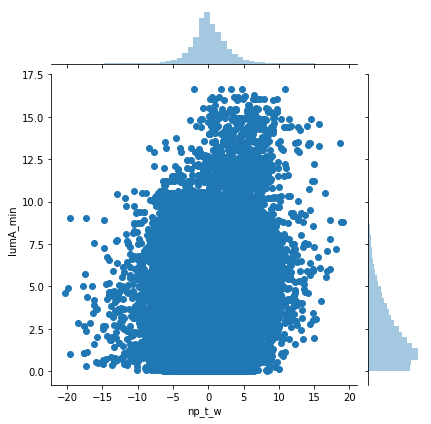

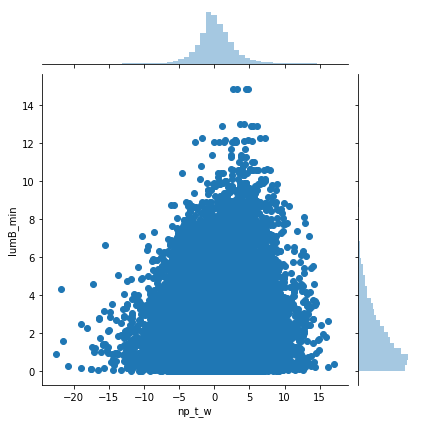

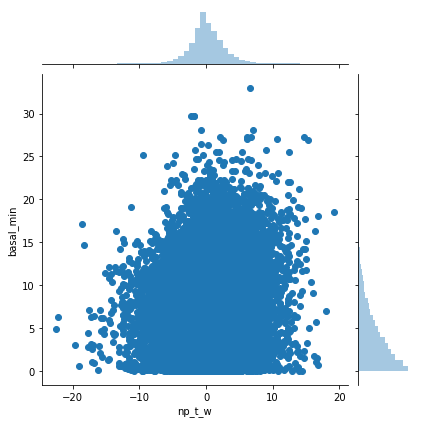

In [85]:
%matplotlib inline
sns.jointplot(x="np_t_w", y="lumA_min", data=brca_clove_subtypeCorr.sample(100000))
sns.jointplot(x="np_t_w", y="lumB_min", data=brca_clove_subtypeCorr.sample(100000))
sns.jointplot(x="np_t_w", y="basal_min", data=brca_clove_subtypeCorr.sample(100000))


Find known differentiators of LumA, LumB, and Basal

In [88]:
# get top (>sig3) positive (higher/more in that subtype) differentators
lumA_sig=brca_clove_subtypeCorr['lumA_min'].mean() + 3 * brca_clove_subtypeCorr['lumA_min'].std()
lumB_sig=brca_clove_subtypeCorr['lumB_min'].mean() + 3 * brca_clove_subtypeCorr['lumB_min'].std()
basal_sig=brca_clove_subtypeCorr['basal_min'].mean() + 3 * brca_clove_subtypeCorr['basal_min'].std()

In [94]:
brca_clove_subtypeCorr[brca_clove_subtypeCorr['lumA_min']>lumA_sig].sort_values(by='np_t_w', ascending=False).head(20)

,exp,cnv,np_t_w,np_p_w,lumA_min,lumB_min,basal_min
440717,SUV39H2,RASA1,19.585865,3.487828e-73,9.560417,0.073341,6.115580
255466,RAD54L,GUSBP9,18.644010,2.387487e-67,13.477864,3.755663,21.366867
440713,SUV39H2,UBLCP1,17.647788,2.459015e-61,9.560417,0.073341,18.334784
460947,HJURP,POLK,17.515297,1.503764e-60,14.885171,5.367871,7.027064
77010,CHEK1,LOC101928154,17.246391,5.798307e-59,11.233622,2.616211,19.380866
304134,CENPN,LOC100289230,17.156612,1.949056e-58,13.563114,3.831072,22.541945
690485,MELK,POLR3G,16.981118,2.063341e-57,12.336760,3.481312,18.723608
690488,MELK,MCTP1,16.933284,3.916053e-57,14.885067,5.165092,10.332416
849160,CENPO,MIR3607,16.809236,2.053156e-56,14.438343,5.532831,18.097160
83822,FOXM1,hsa-mir-582,16.727688,6.078682e-56,12.943404,3.753964,19.988381


In [95]:
brca_clove_subtypeCorr[brca_clove_subtypeCorr['lumB_min']>lumB_sig].sort_values(by='np_t_w', ascending=False).head(20)

,exp,cnv,np_t_w,np_p_w,lumA_min,lumB_min,basal_min
524212,GINS1,UTP15,14.870707,1.381205e-45,14.285365,8.513318,9.522839
430190,SGOL1,RFESD,14.309765,1.305242e-42,14.872896,8.868720,10.266783
581892,UBE2E3,PCDHGB8P,14.152534,8.630741e-42,2.073199,6.861117,9.904889
806330,CKAP2L,ANKRA2,13.996276,5.562527e-41,14.472269,8.560496,3.376566
739430,CENPI,LOC644936,13.663293,2.813380e-39,14.019009,6.949279,14.368768
581907,UBE2E3,PWWP2A,13.631770,4.065167e-39,2.073199,6.861117,10.074774
193392,KIF15,MIR3660,13.625879,4.354342e-39,13.623102,7.398532,13.788709
776509,NCAPG,CWC27,13.597672,6.049135e-39,16.066418,8.090529,12.268193
542173,KIF18B,RHOJ,13.535378,1.248166e-38,16.192385,7.124820,13.592220
466237,BIRC5,FAM151B,13.534053,1.267515e-38,10.021667,6.792734,2.350440


In [96]:
brca_clove_subtypeCorr[brca_clove_subtypeCorr['basal_min']>basal_sig].sort_values(by='np_t_w', ascending=False).head(20)

,exp,cnv,np_t_w,np_p_w,lumA_min,lumB_min,basal_min
173354,FAM136A,LOC441081,19.132824,2.326855e-70,8.746569,0.744777,18.544055
111957,GTPBP4,MIR4803,18.823865,1.881379e-68,8.803104,0.042885,20.208158
255466,RAD54L,GUSBP9,18.644010,2.387487e-67,13.477864,3.755663,21.366867
111969,GTPBP4,LOC102546229,17.761085,5.196767e-62,8.803104,0.042885,20.208158
440713,SUV39H2,UBLCP1,17.647788,2.459015e-61,9.560417,0.073341,18.334784
912067,CDCA7,RP11-257I8.2,17.306931,2.555009e-59,8.940451,1.070278,27.665604
145362,SRPK1,RGMB-AS1,17.259862,4.832476e-59,9.162075,0.447542,23.221098
77010,CHEK1,LOC101928154,17.246391,5.798307e-59,11.233622,2.616211,19.380866
167663,CDC123,MIR548AO,17.201054,1.069992e-58,6.028532,1.516029,17.983026
304134,CENPN,LOC100289230,17.156612,1.949056e-58,13.563114,3.831072,22.541945


below is for calculating cloves in basal, luminalA, and luminalB individually

In [13]:
%matplotlib inline
expdf, cnvdf = load_data('data/', 'data/breast_CCLE_DEL_calls.csv.gz')

,TCGA-A2-A0T2-01A
0,0.0000
1,20.3388
2,5.9652
3,128.2570
4,3062.8600
5,0.0000
6,99.4204
7,0.8917
8,0.0000
9,0.0000


In [ ]:
%matplotlib inline
expdf, cnvdf = load_data('data/breast_mrna.tab.gz', 'data/breast_CCLE_DEL_calls.csv.gz')